LAB 6

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [60]:
file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

In [74]:
#QUESTION A1

#(a)
def sum_unit(inputs, weights, bias):
    #sum of inputs * their weights, + bias
    total = 0
    for i in range(len(inputs)):
        total += inputs[i] * weights[i]
    return total + bias

#(b)
def step(val): #step func
    return 1 if val > 0 else 0

def bipolar_step(val): #bipolar step func
    return 1 if val > 0 else -1

def sigmoid(val): #sigmoid func
    return 1 / (1 + (2.71828 ** -val))

def tanh(val): #tanh funct
    return (2 / (1 + (2.71828 ** (-2 * val)))) - 1

def relu(val):  #relu func
    return max(0, val)

def leaky_relu(val):  #leaky relu func
    return val if val > 0 else 0.01 * val

#(c)
def error_comparator(predicted, actual):
    return actual - predicted

final weights: [-0.1   0.1   0.05]
no. of epochs: 129


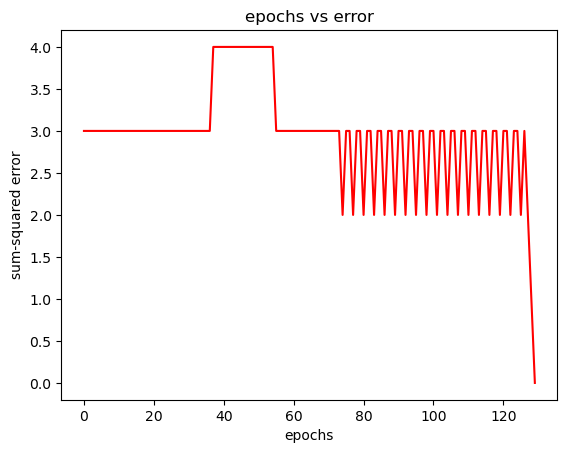

In [64]:
#QUESTION A2

import numpy as np
import matplotlib.pyplot as plt

#perceptron func
def perceptron_train(X, y, W0, W1, W2, alpha, max_epochs=1000, threshold=0.002):
    epochs = 0
    error_history = []
    weights = np.array([W0, W1, W2])
    
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            #input with bias
            inputs = np.append(1, X[i])
            weighted_sum = np.dot(inputs, weights)
            output = step(weighted_sum)
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights = weights + alpha * error * inputs
        
        error_history.append(total_error)
        
        #check convergence
        if total_error <= threshold:
            break
        
        epochs += 1
    
    return weights, epochs, error_history

#AND gate ip and op
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initialize weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

#train perceptron
final_weights, epochs, error_history = perceptron_train(X, y, W0, W1, W2, alpha)

print("final weights:", final_weights)
print("no. of epochs:", epochs)

#plot
plt.plot(range(epochs + 1), error_history, color='red')
plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.title('epochs vs error')
plt.show()


step activation:
final weights: [-0.1   0.1   0.05]
epochs: 130
----------------------------------------
bipolar step activation:
final weights: [-0.1   0.1   0.05]
epochs: 1000
----------------------------------------
sigmoid activation:
final weights: [-6.13531536  3.97083463  3.96394977]
epochs: 1000
----------------------------------------
relu activation:
final weights: [-0.92774472  0.95116001  0.94981086]
epochs: 390
----------------------------------------
leaky relu activation:
final weights: [-0.92927378  0.9530528   0.95175339]
epochs: 433
----------------------------------------


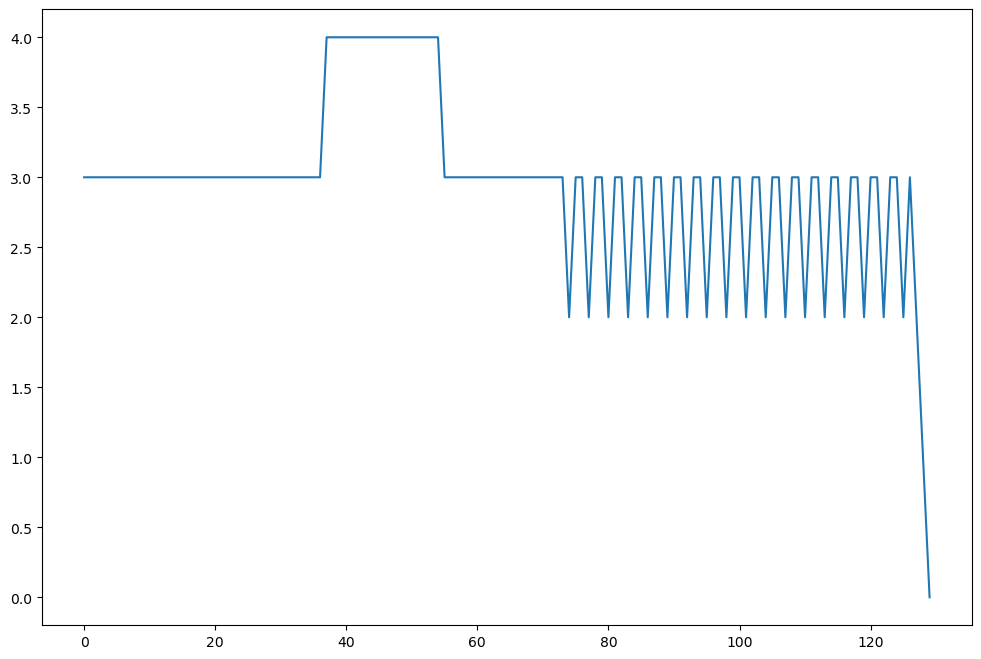

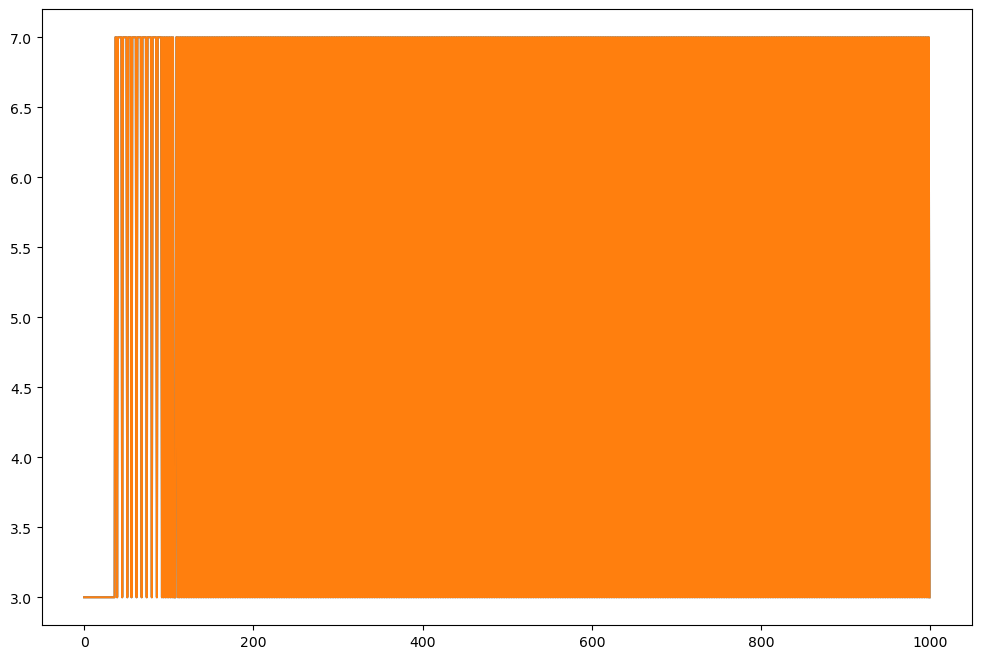

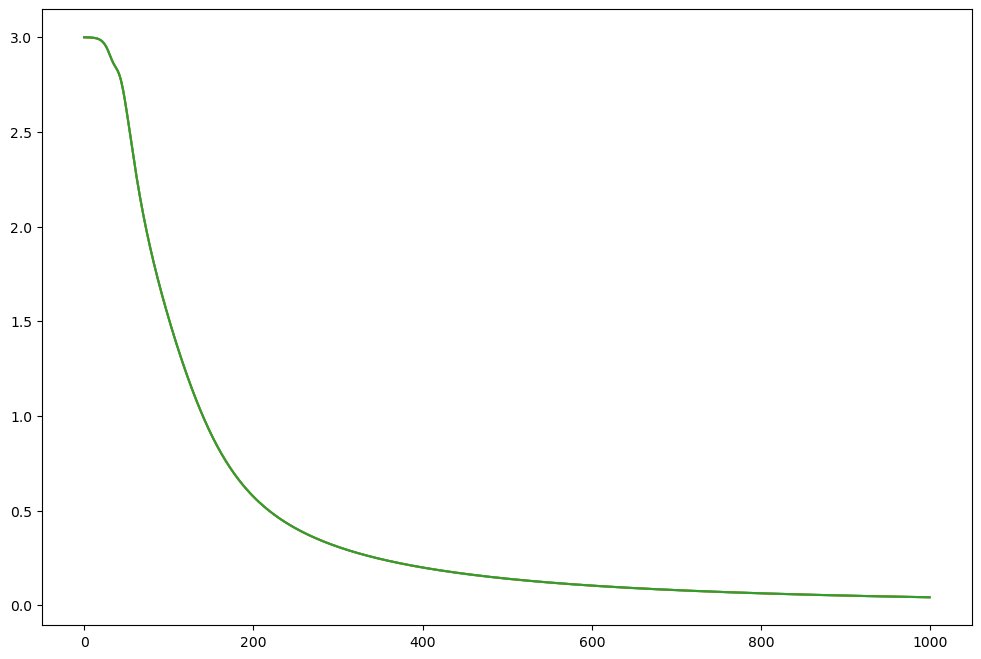

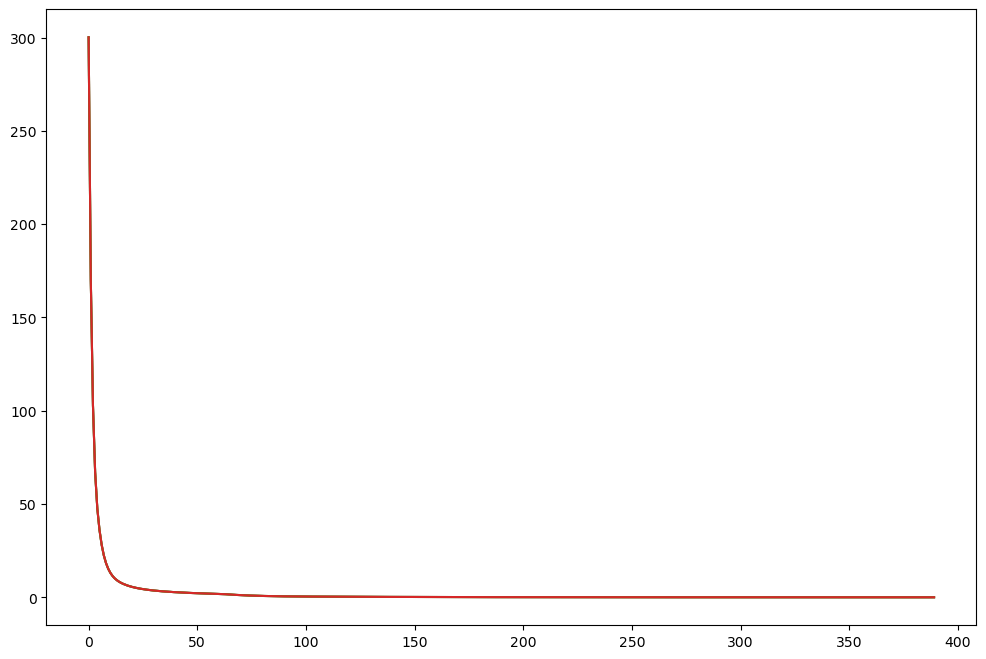

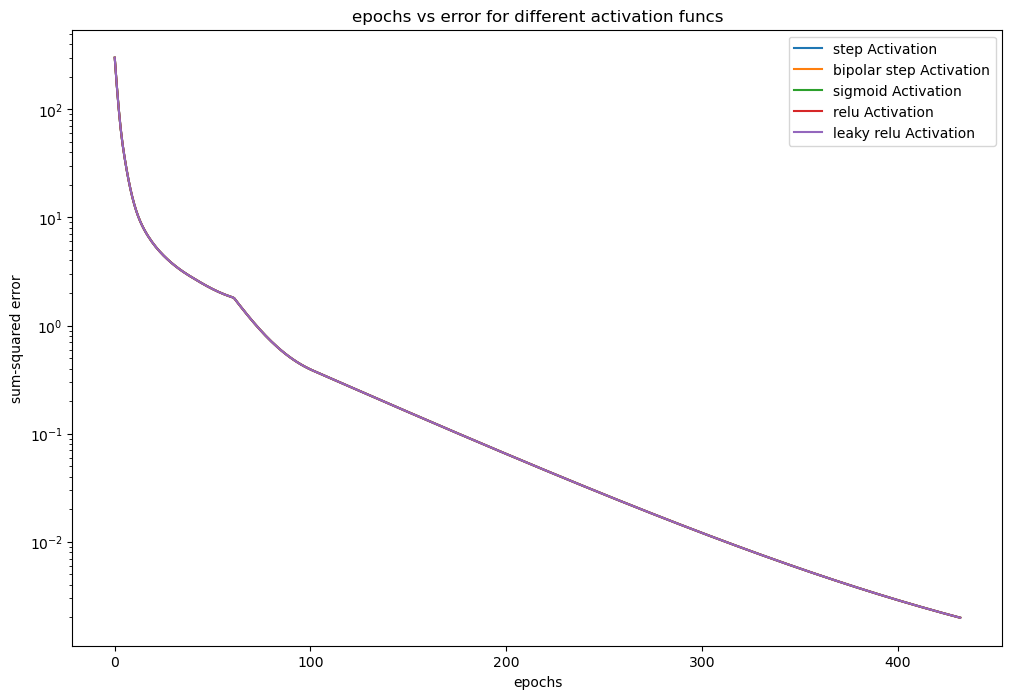

In [66]:
#QUESTION A3

def train_perceptron(X, y, act_func, w0, w1, w2, lr, max_epochs=1000, error_threshold=0.002):
    errors = []
    weights = np.array([w0, w1, w2])
    
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            #add bias input
            inputs = np.append(1, X[i])
            #weighted sum
            weighted_sum = np.dot(inputs, weights)
            #activation function
            output = act_func(weighted_sum)
            #calculate error
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights += lr * error * inputs
        
        errors.append(total_error)
        
        #stop if error below threshold
        if total_error <= error_threshold:
            break
    
    return weights, epoch + 1, errors

#AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
lr = 0.05

#train perceptron with different activation funcs
act_funcs = {
    "step": step,
    "bipolar step": bipolar_step,
    "sigmoid": sigmoid,
    "relu": relu,
    "leaky relu": leaky_relu
}

results = {}

for name, func in act_funcs.items():
    final_weights, epochs, error_history = train_perceptron(X, y, func, w0, w1, w2, lr)
    results[name] = {
        "final_weights": final_weights,
        "epochs": epochs,
        "error_history": error_history
    }
    print(f"{name} activation:")
    print(f"final weights: {final_weights}")
    print(f"epochs: {epochs}")
    print("-" * 40)

    plt.figure(figsize=(12, 8))

    # Plotting the error history
    for name, result in results.items():
        plt.plot(range(len(error_history)), error_history, label=f'{name} Activation')

plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.yscale('log')
plt.title('epochs vs error for different activation funcs')
plt.legend()
plt.show()


Learning rate: 0.1, Converged in 68 epochs
Learning rate: 0.2, Converged in 37 epochs
Learning rate: 0.3, Converged in 23 epochs
Learning rate: 0.4, Converged in 23 epochs
Learning rate: 0.5, Converged in 20 epochs
Learning rate: 0.6, Converged in 19 epochs
Learning rate: 0.7, Converged in 15 epochs
Learning rate: 0.8, Converged in 14 epochs
Learning rate: 0.9, Converged in 13 epochs
Learning rate: 1, Converged in 14 epochs


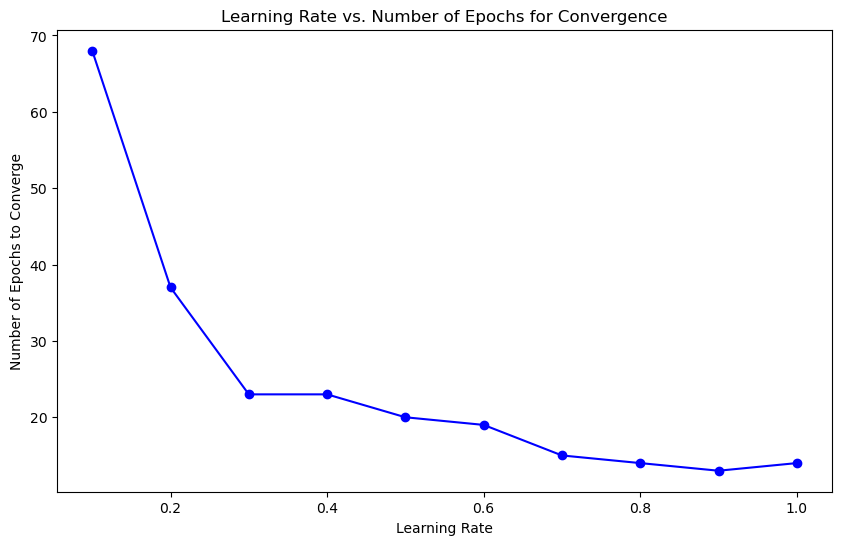

In [67]:
#QUESTION A4

import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  #initial weights 
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  #add bias 
                net_input = np.dot(xi, self.weights)
                prediction = step(net_input)
                
                error = y[i] - prediction
                total_error += error ** 2
                
                #update weights
                self.weights += self.learning_rate * error * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                return epoch + 1
        return self.epochs

#define AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  #output of AND gate

#learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_to_converge = []

#train perceptron with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=1000)
    epochs = perceptron.fit(X, y)
    epochs_to_converge.append(epochs)
    print(f'Learning rate: {lr}, Converged in {epochs} epochs')

#plot number of epochs to converge against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Number of Epochs for Convergence')
#plt.grid(True)
plt.show()

Learning rate: 0.1, Converged in 1000 epochs
Learning rate: 0.2, Converged in 1000 epochs
Learning rate: 0.3, Converged in 1000 epochs
Learning rate: 0.4, Converged in 1000 epochs
Learning rate: 0.5, Converged in 1000 epochs
Learning rate: 0.6, Converged in 1000 epochs
Learning rate: 0.7, Converged in 1000 epochs
Learning rate: 0.8, Converged in 1000 epochs
Learning rate: 0.9, Converged in 1000 epochs
Learning rate: 1, Converged in 1000 epochs


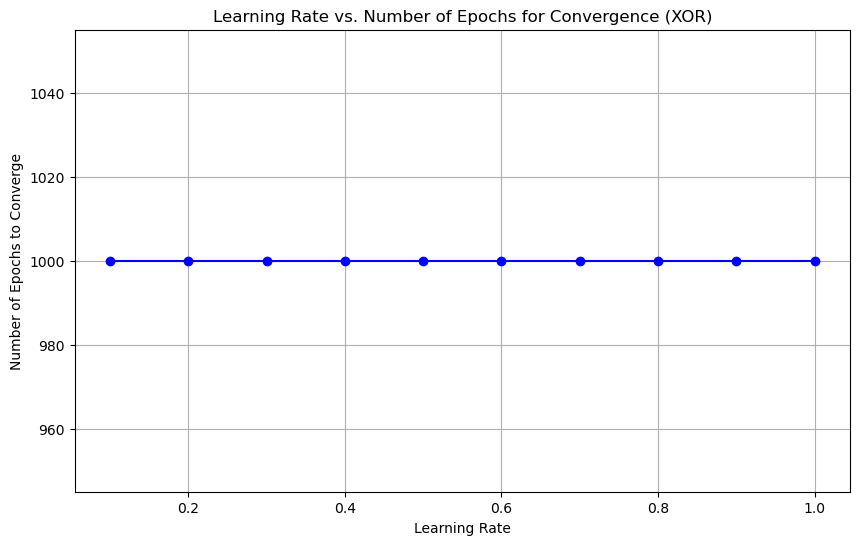

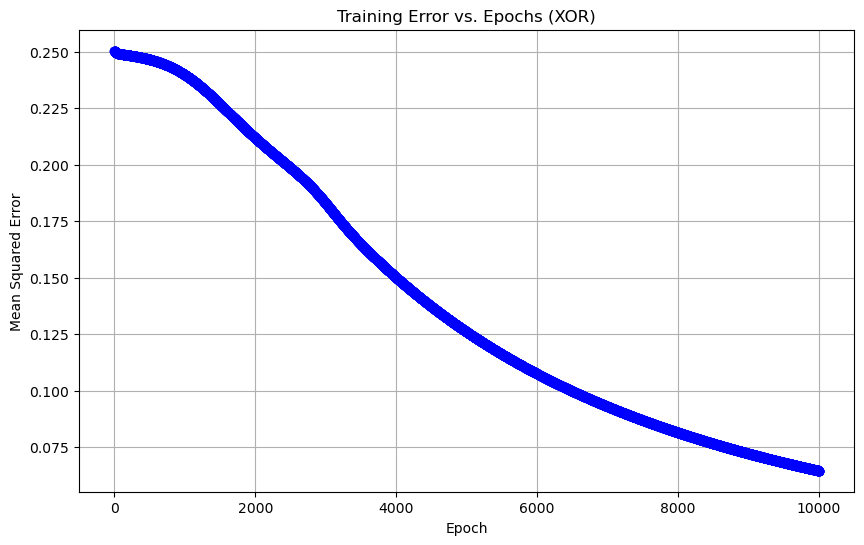

Activation function: bipolar_step, Converged in 10000 epochs


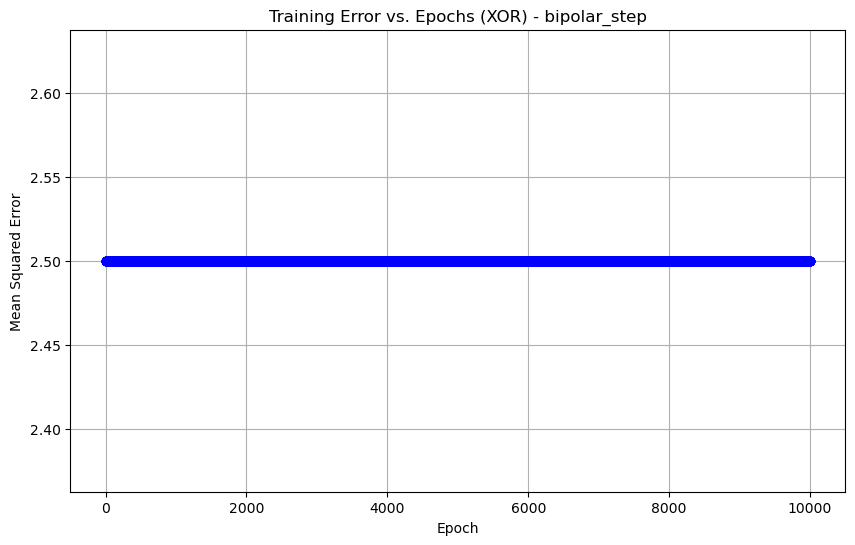

Activation function: sigmoid, Converged in 10000 epochs


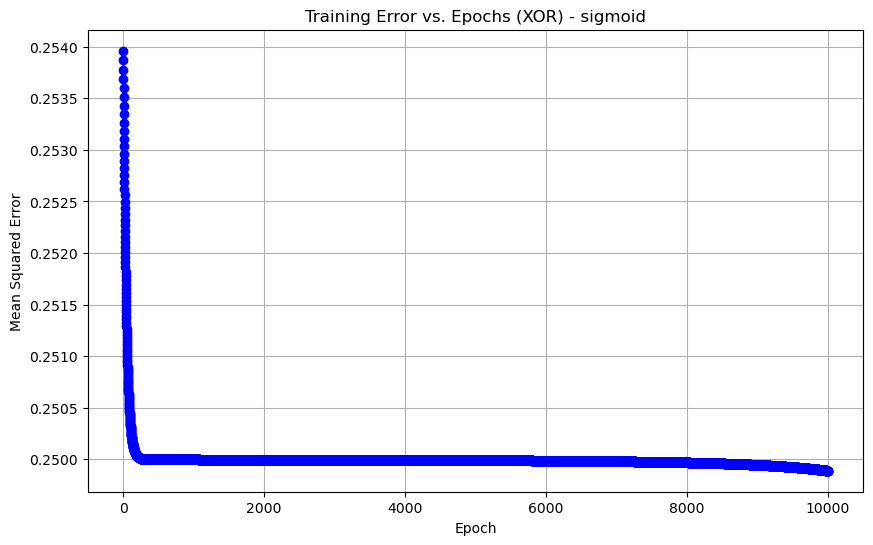

Activation function: relu, Converged in 10000 epochs


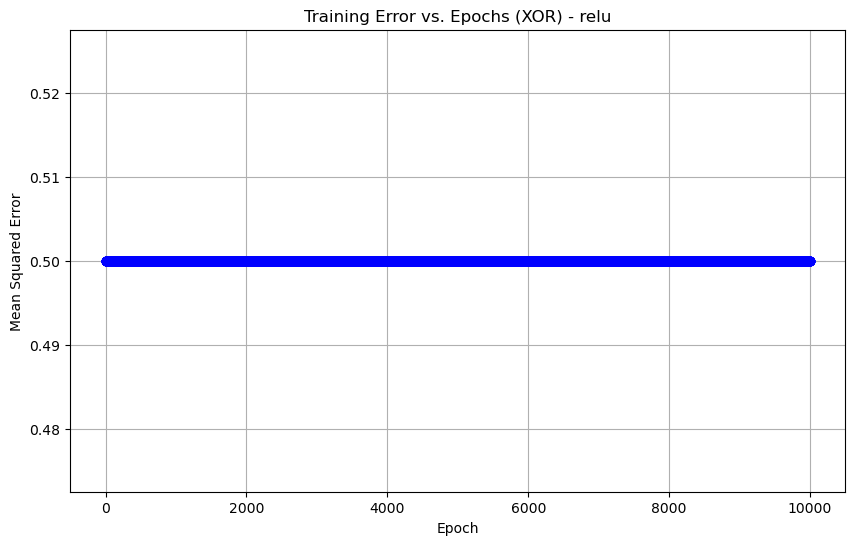

In [82]:
#UESTION A5

import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights W0, W1, W2
        self.error_history = []
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = np.insert(X[i], 0, 1)  # Add bias term
                net_input = np.dot(xi, self.weights)
                prediction = step_activation(net_input)
                
                error = y[i] - prediction
                total_error += error ** 2
                
                # Update weights
                self.weights += self.learning_rate * error * xi

            self.error_history.append(total_error)
            if total_error <= 0.002:
                return epoch + 1
        return self.epochs

# Define XOR gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # Output of XOR gate

# Define learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_to_converge = []

# Train perceptron with different learning rates
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=1000)
    epochs = perceptron.fit(X, y)
    epochs_to_converge.append(epochs)
    print(f'Learning rate: {lr}, Converged in {epochs} epochs')

# Plot the number of epochs to converge against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_to_converge, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs to Converge')
plt.title('Learning Rate vs. Number of Epochs for Convergence (XOR)')
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Multi-Layer Perceptron class
class MLP:
    def __init__(self, learning_rate=0.1, epochs=10000, hidden_nodes=2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_nodes = hidden_nodes
        self.error_history = []

    def fit(self, X, y):
        # Initialize weights
        self.input_layer_weights = np.random.uniform(-1, 1, (X.shape[1], self.hidden_nodes))
        self.hidden_layer_weights = np.random.uniform(-1, 1, (self.hidden_nodes, 1))
        self.bias = np.ones((1, X.shape[0]))

        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.input_layer_weights)
            hidden_layer_output = sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.hidden_layer_weights)
            output = sigmoid(output_layer_input)

            # Calculate error
            error = y - output
            total_error = np.mean(error**2)
            self.error_history.append(total_error)

            # Backward pass
            output_error = error * sigmoid_derivative(output_layer_input)
            hidden_error = np.dot(output_error, self.hidden_layer_weights.T) * sigmoid_derivative(hidden_layer_input)

            # Update weights
            self.hidden_layer_weights += self.learning_rate * np.dot(hidden_layer_output.T, output_error)
            self.input_layer_weights += self.learning_rate * np.dot(X.T, hidden_error)

            if total_error <= 0.002:
                return epoch + 1

        return self.epochs

# Define XOR gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # Output of XOR gate (must be 2D for MLP)

# Initialize and train MLP
mlp = MLP(learning_rate=0.1, epochs=10000, hidden_nodes=2)
epochs = mlp.fit(X, y)

# Plot error history
plt.figure(figsize=(10, 6))
plt.plot(mlp.error_history, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Error vs. Epochs (XOR)')
plt.grid(True)
plt.show()


# Define activation functions and their derivatives
def bipolar_step(x):
    return np.where(x >= 0, 1, -1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Multi-Layer Perceptron class with different activation functions
class MLP:
    def __init__(self, activation_fn='sigmoid', learning_rate=0.1, epochs=10000, hidden_nodes=2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_nodes = hidden_nodes
        self.activation_fn = activation_fn
        self.error_history = []

    def activation(self, x):
        if self.activation_fn == 'bipolar_step':
            return bipolar_step(x)
        elif self.activation_fn == 'sigmoid':
            return sigmoid(x)
        elif self.activation_fn == 'relu':
            return relu(x)
    
    def activation_derivative(self, x):
        if self.activation_fn == 'bipolar_step':
            return np.where(x >= 0, 0, 0)  # Derivative is zero, no learning
        elif self.activation_fn == 'sigmoid':
            return sigmoid_derivative(x)
        elif self.activation_fn == 'relu':
            return relu_derivative(x)

    def fit(self, X, y):
        # Initialize weights
        self.input_layer_weights = np.random.uniform(-1, 1, (X.shape[1], self.hidden_nodes))
        self.hidden_layer_weights = np.random.uniform(-1, 1, (self.hidden_nodes, 1))

        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.input_layer_weights)
            hidden_layer_output = self.activation(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.hidden_layer_weights)
            output = self.activation(output_layer_input)

            # Calculate error
            error = y - output
            total_error = np.mean(error**2)
            self.error_history.append(total_error)

            # Backward pass
            output_error = error * self.activation_derivative(output_layer_input)
            hidden_error = np.dot(output_error, self.hidden_layer_weights.T) * self.activation_derivative(hidden_layer_input)

            # Update weights
            self.hidden_layer_weights += self.learning_rate * np.dot(hidden_layer_output.T, output_error)
            self.input_layer_weights += self.learning_rate * np.dot(X.T, hidden_error)

            if total_error <= 0.002:
                return epoch + 1

        return self.epochs

# Test different activation functions
activation_functions = ['bipolar_step', 'sigmoid', 'relu']
for func in activation_functions:
    mlp = MLP(activation_fn=func, learning_rate=0.1, epochs=10000, hidden_nodes=2)
    epochs = mlp.fit(X, y)
    print(f'Activation function: {func}, Converged in {epochs} epochs')
    
    # Plot error history
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.error_history, marker='o', linestyle='-', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training Error vs. Epochs (XOR) - {func}')
    plt.grid(True)
    plt.show()

Accuracy: 100.00%


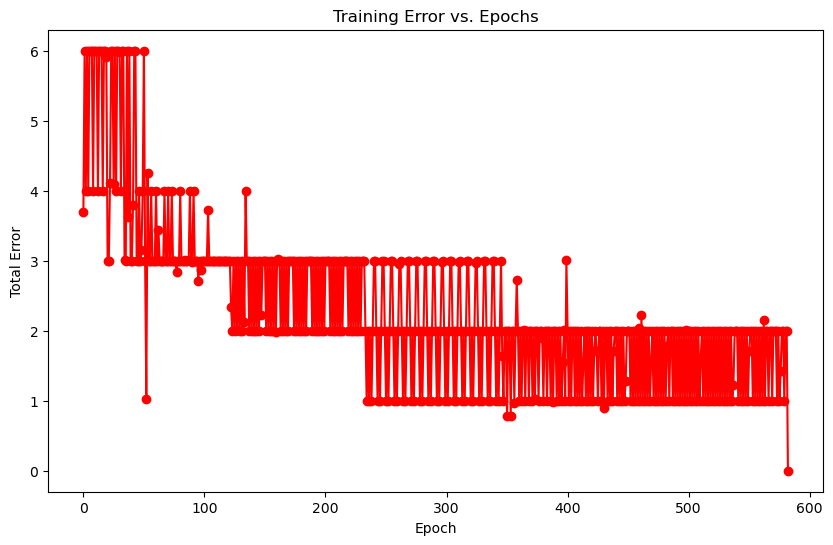

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define sigmoid derivative function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.error_history = []
    
    def fit(self, X, y):
        # Initialize weights
        self.weights = np.random.uniform(-1, 1, X.shape[1])
        
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X)):
                xi = X[i]
                yi = y[i]
                
                # Calculate net input
                net_input = np.dot(xi, self.weights) + self.bias
                prediction = sigmoid(net_input)
                
                # Calculate error
                error = yi - prediction
                total_error += error ** 2
                
                # Update weights and bias
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error
                
            self.error_history.append(total_error)
            if total_error <= 0.002:
                break

        return self.weights, self.bias

    def predict(self, X):
        net_input = np.dot(X, self.weights) + self.bias
        return np.round(sigmoid(net_input))  # Round to get binary output

# Customer data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

# Encode the target variable
df['High Value'] = df['High Value'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value'].values

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
weights, bias = perceptron.fit(X, y)

# Predict
y_pred = perceptron.predict(X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot error history
plt.figure(figsize=(10, 6))
plt.plot(perceptron.error_history, marker='o', linestyle='-', color='red')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Training Error vs. Epochs')
#plt.grid(True)
plt.show()

In [ ]:
#7

